<a href="https://colab.research.google.com/github/pikey-msc/PythonBasico/blob/master/M3/C7_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install PyCurve

PyCurve es un paquete de Python que proporciona al usuario una herramienta útil de curva de rendimiento de alto nivel. Por ejemplo, puede crear una instancia de una Curva y obtener un d_rate, un factor de descuento, incluso un d_rate directo dada una metodología múltiple desde la interpolación lineal hasta métodos de parametrización como Nelson Siegel o Bjork-Christensen. PyCurve también puede proporcionar soluciones para construir una curva de rendimiento o cotizar derivados de tasas de interés a través de Vasicek o Hull and White.

A continuación, se encuentran las características que aborda este paquete:

* Suavizado de curvas:
  * Crear objeto de curva con dos matrices numpy (t, rt)
  * Interpolación lineal dada una curva
  * Interpolación cúbica dada una Curva
  * Nelson Siegel y Svensson creación de modelos y trazado de componentes
  * Calibración de Nelson Siegel y Svensson dada una curva
  * Bjork Christensen y Augmented (6 factores) creación de modelos y trazado de componentes
* Modelado estocástico:
  * Simulación del modelo Vasicek
  * Simulación de modelo de un factor de casco y blanco

# Curve Object

Este objeto consiste en una simple encapsulación de la curva de rendimiento. Este objeto es utilizado por otras clases para encapsular resultados o para crear directamente una curva con los datos observados en el mercado.

    Attributes	Type	    Description
    rt	     Private	    Interest rates as float in a numpy.ndarray
    t	       Private	    Time as float or int in a numpy.ndarray

In [4]:
from PyCurve.curve import Curve
import numpy as np

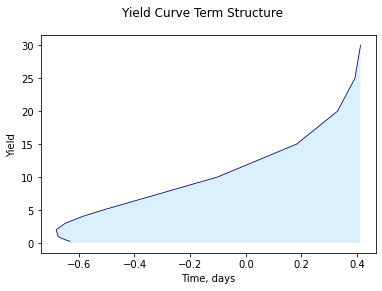

[ 0.25  0.5   0.75  1.    2.    3.    4.    5.   10.   15.   20.   25.
 30.  ]
[-0.63171  -0.650322 -0.664493 -0.674608 -0.681294 -0.647593 -0.587828
 -0.51251  -0.101804  0.182851  0.32962   0.392117  0.412151]


In [5]:
time = np.array([0.25, 0.5, 0.75, 1., 2., 
        3., 4., 5., 10., 15., 
        20.,25.,30.])
rate = np.array([-0.63171, -0.650322, -0.664493, -0.674608, -0.681294,
        -0.647593, -0.587828, -0.51251, -0.101804,  0.182851,
        0.32962,0.392117,  0.412151])
curve = Curve(rate,time)
curve.plot_curve()
print(curve.get_rate)
print(curve.get_time)

#Simulation Object

Este objeto consiste en un encapsulado de simulación simple. Este objeto es utilizado por otras clases para encapsular los resultados de la simulación de monte carlo. Este objeto tiene un método incorporado que podría realizar la conversión de una simulación a una curva de rendimiento para una curva de factor de descuento.

    Attributes	Type	              Description
       sim	  Private	    Simulated paths matrix numpy.ndarray
        dt      Private	    delta_time as float or int in a numpy.ndarray

Usando para simulación por Vasicek

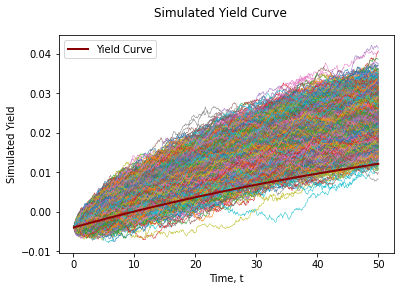

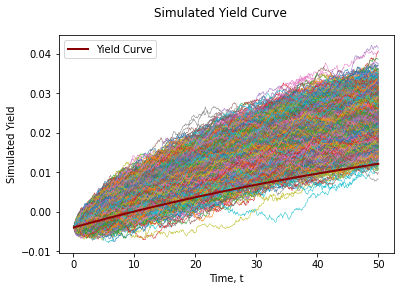

In [6]:
from PyCurve.vasicek import Vasicek
vasicek_model = Vasicek(0.02, 0.04, 0.001, -0.004, 50, 30 / 365)
simulation = vasicek_model.simulate_paths(2000) #Return a Simulation and then we can apply Simulation Methods
simulation.plot_yield_curve()

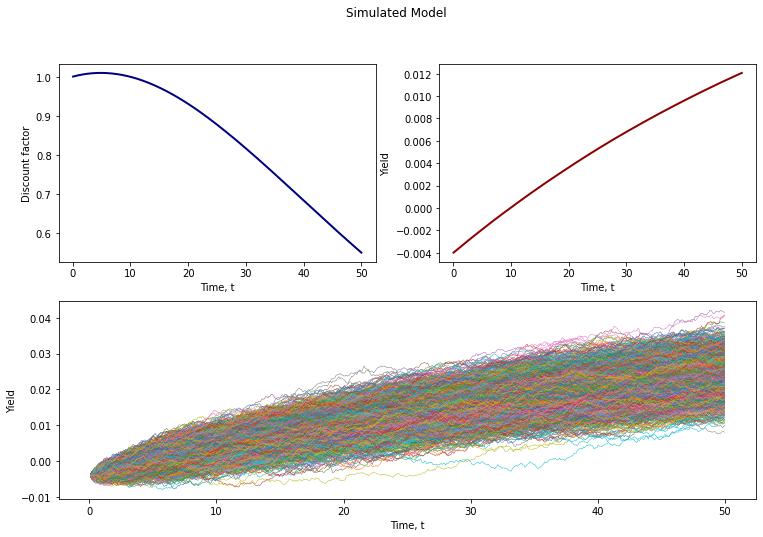

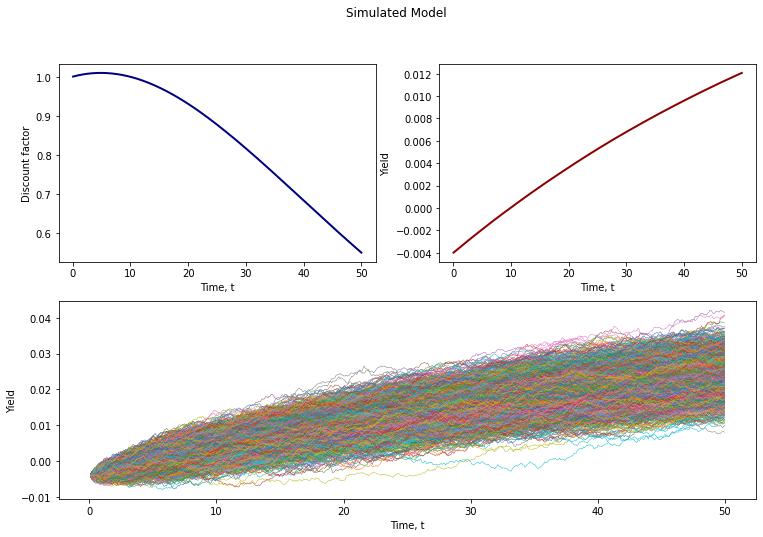

In [8]:
simulation.plot_model()

# Construcción Yield Curve

Esta sección es la descripción con ejemplos de lo que puede hacer con este paquete. Tenga en cuenta que para todos los ejemplos en esta sección, la curva se refiere a la curva a continuación. Puede ver un ejemplo con respecto al objeto de curva en la sección dedicada.

In [10]:
time = np.array([0.25, 0.5, 0.75, 1., 2., 
        3., 4., 5., 10., 15., 
        20.,25.,30.])
d_rate = np.array([-0.63171, -0.650322, -0.664493, -0.674608, -0.681294,
        -0.647593, -0.587828, -0.51251, -0.101804,  0.182851,
        0.32962,0.392117,  0.412151])
curve = Curve(time,d_rate)

# Lineal

Interpola cualquier d_rate de una curva de rendimiento mediante interpolación lineal. Este módulo está construido usando scipy.interpolate

    Attributes     	 Type	            Description
      curve	        Private	   Curve Object to be intepolated
    func_rate	      Private	   interp1d Object used to interpolate

In [11]:
from PyCurve.linear import LinearCurve
linear_curve = LinearCurve(curve)
print("7.5-year d_rate : "+str(linear_curve.d_rate(7.5)))
print("7.5-year discount d_rate : "+str(linear_curve.df_t(7.5)))
print("Forward d_rate between 7.5 and 12.5 years : "+str(linear_curve.forward(7.5,12.5)))

7.5-year d_rate : -0.307157
7.5-year discount d_rate : 1.0233404498400862
Forward d_rate between 7.5 and 12.5 years : 0.5620442499999999


# Cúbica

Interpola cualquier d_rate de una curva de rendimiento mediante interpolación lineal. Este módulo está construido usando scipy.interpolate

    Attributes     	 Type	            Description
      curve	        Private	   Curve Object to be intepolated
    func_rate	      Private	   PPoly Object used to interpolate



In [12]:
from PyCurve.cubic import CubicCurve
cubic_curve = CubicCurve(curve)
print("10-year d_rate : "+str(cubic_curve.d_rate(7.5)))
print("10-year discount d_rate : "+str(cubic_curve.df_t(7.5)))
print("Forward d_rate between 10 and 20 years : "+str(cubic_curve.forward(7.5,12.5)))

10-year d_rate : -0.3036366057950627
10-year discount d_rate : 1.0230694659050514
Forward d_rate between 10 and 20 years : 0.6078001168478189


# Nelson-Siegel

    Attributes	  Type        	Description
      beta0	    Private	Model Coefficient Beta0
      beta1	    Private	Model Coefficient Beta1
      beta2	    Private	Model Coefficient Beta2
      tau	      Private	Model Coefficient tau
      attr_list	Private	Coefficient list

Creación de un modelo y calibración

In [13]:
from PyCurve.nelson_siegel import NelsonSiegel
ns = NelsonSiegel(0.3,0.4,12,1)
ns.calibrate(curve)

Nelson Siegel Model
beta0 = 0.7515060651181737
beta1 = -1.3304971918205475
beta2 = -2.2203178802031354
tau = 2.549305640853408
____________________________
Calibration Results
b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Mean Squared Error 0.004236730692644115
Number of Iterations 20
____________________________


      fun: 0.004236730692644115
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.40094403e-06,  9.51669299e-07, -2.32799890e-07,  7.98493216e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 105
      nit: 20
   status: 0
  success: True
        x: array([ 0.75150607, -1.33049719, -2.22031788,  2.54930564])

Graficamos y analizamos

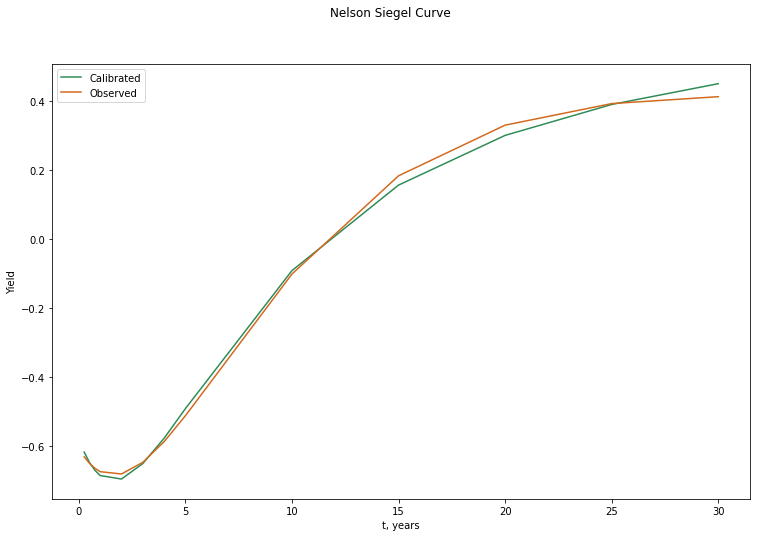

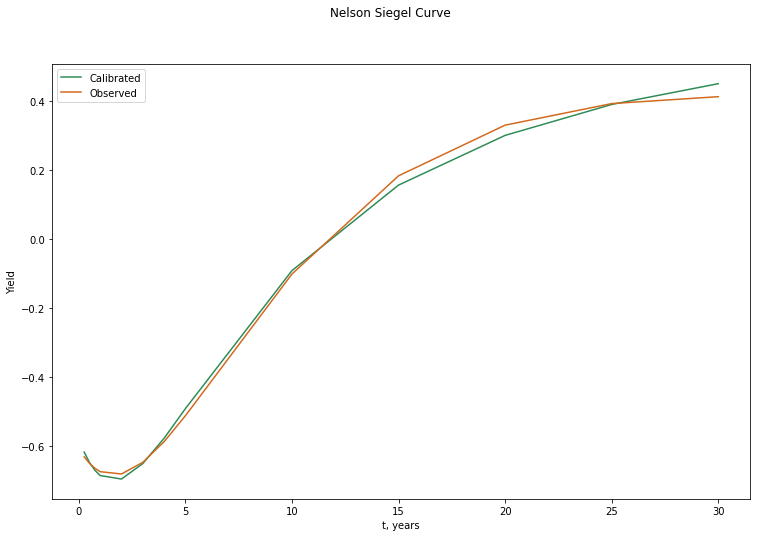

In [15]:
ns.plot_calibrated(curve)

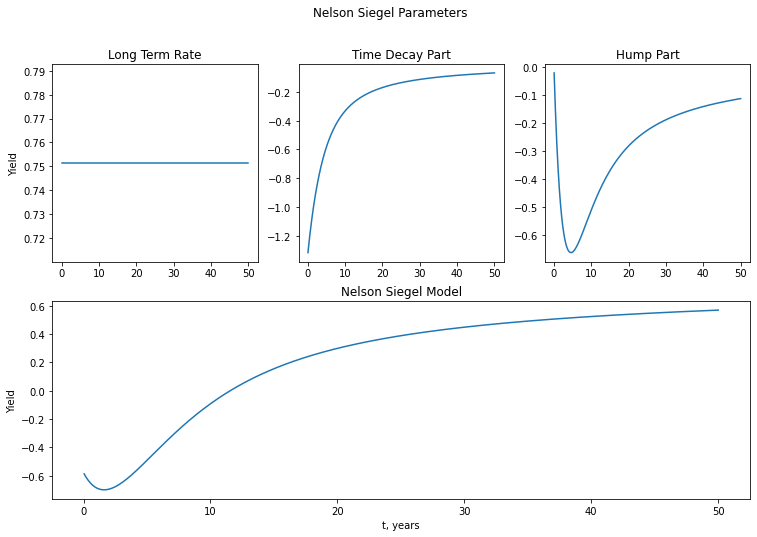

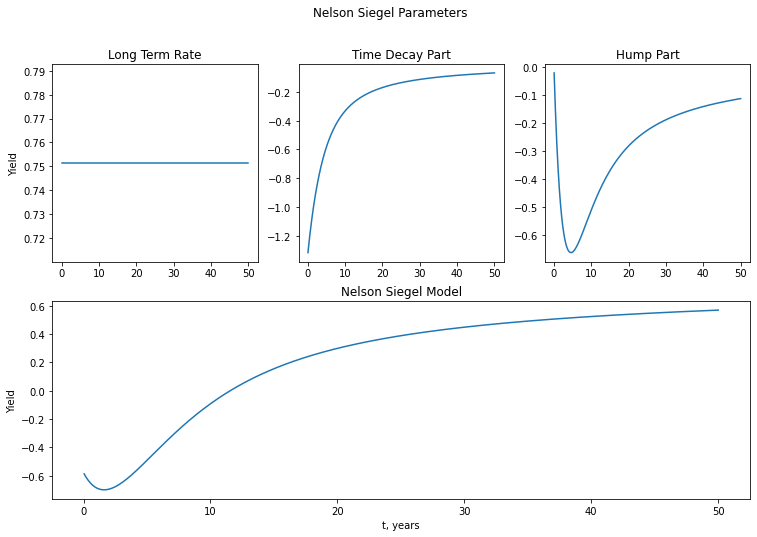

In [16]:
ns.plot_model_params()


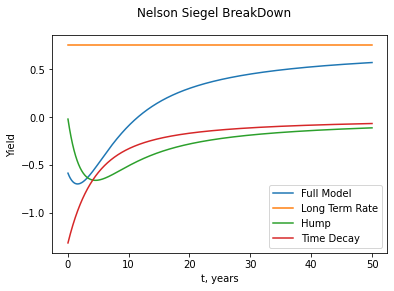

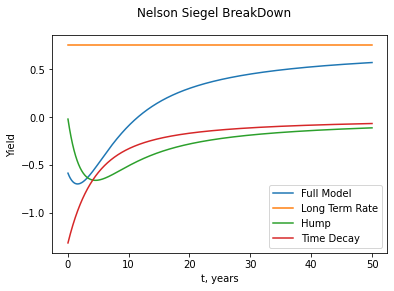

In [17]:
ns.plot_model()

# nelson-siegel-svensson

    Attributes	  Type        	Description
      beta0	    Private	Model Coefficient Beta0
      beta1	    Private	Model Coefficient Beta1
      beta2	    Private	Model Coefficient Beta2
      beta3	    Private	Model Coefficient Beta3
      tau	      Private	Model Coefficient tau
      tau2	     Private	Model Coefficient tau2
      attr_list	Private	Coefficient list

Creación de un modelo y calibración

In [18]:
from PyCurve.svensson_nelson_siegel import NelsonSiegelAugmented
nss = NelsonSiegelAugmented(0.3,0.4,12,12,1,1)
nss.calibrate(curve)

Augmented Nelson Siegel Model
beta0 = 0.7515069899721768
beta1 = -1.3304984657870753
beta2 = -1.3582175132766987
beta3 = -0.8621237683888469
tau = 2.549266569201059
tau2 = 2.5493746180838
____________________________
Calibration Results
b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Mean Squared Error 0.004236730702091673
Number of Iterations 31
____________________________


      fun: 0.004236730702091673
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.69408712e-06, -3.47976856e-06, -1.71754971e-06, -1.71746298e-06,
        1.00457836e-06,  3.23092247e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 245
      nit: 31
   status: 0
  success: True
        x: array([ 0.75150699, -1.33049847, -1.35821751, -0.86212377,  2.54926657,
        2.54937462])

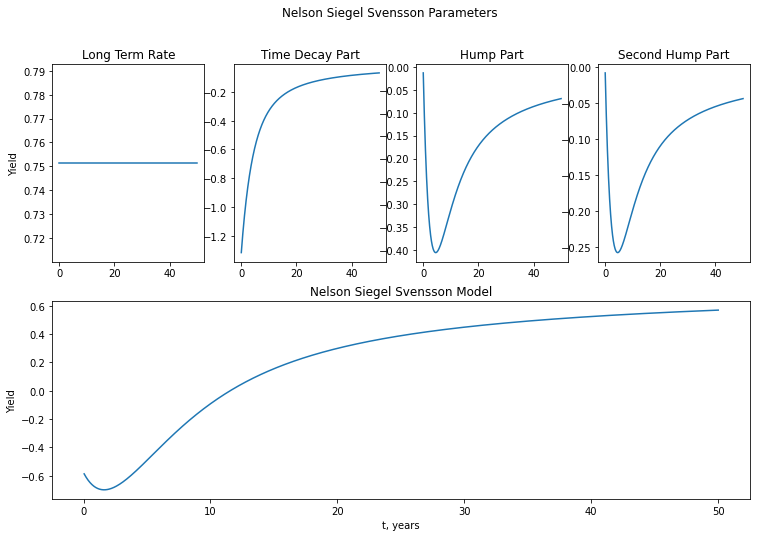

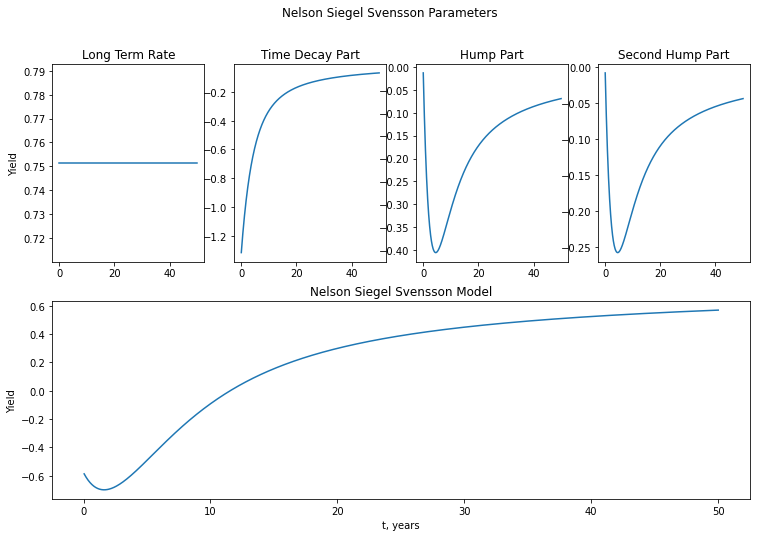

In [19]:
nss.plot_model_params()

# bjork-christensen

    Attributes	  Type        	Description
      beta0	    Private	Model Coefficient Beta0
      beta1	    Private	Model Coefficient Beta1
      beta2	    Private	Model Coefficient Beta2
      beta3	    Private	Model Coefficient Beta3
      tau	      Private	Model Coefficient tau
      attr_list	Private	Coefficient list

Creación de un modelo y calibración

In [20]:
from PyCurve.bjork_christensen import BjorkChristensen
bjc = BjorkChristensen(0.3,0.4,12,12,1)
bjc.calibrate(curve)

Bjork & Christensen Model
beta0 = 0.7241026589870588
beta1 = 1.2630395496236841
beta2 = -4.0757742720552725
beta3 = -2.6157870888589687
tau = 2.045490886795675
____________________________
Calibration Results
b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Mean Squared Error 0.002575936865761161
Number of Iterations 37
____________________________


      fun: 0.002575936865761161
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.19661225e-06,  8.60075899e-07, -9.77299838e-07,  1.48934684e-06,
        4.61393077e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 252
      nit: 37
   status: 0
  success: True
        x: array([ 0.72410266,  1.26303955, -4.07577427, -2.61578709,  2.04549089])

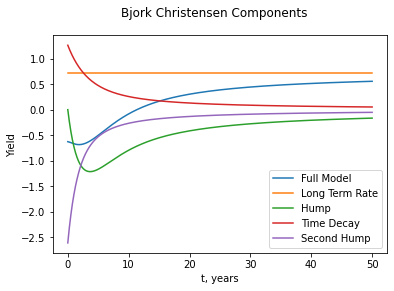

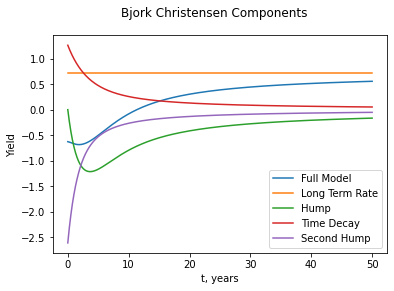

In [21]:
bjc.plot_model()

# bjork-christensen-augmented

    Attributes  	Type        	Description
      beta0	    Private	Model Coefficient Beta0
      beta1	    Private	Model Coefficient Beta1
      beta2	    Private	Model Coefficient Beta2
      beta3	    Private	Model Coefficient Beta3
      beta4	    Private	Model Coefficient Beta4
      tau	      Private	Model Coefficient tau
      attr_list	Private	Coefficient list

Creación de un modelo y calibración

In [22]:
from PyCurve.bjork_christensen_augmented import BjorkChristensenAugmented
bjc_a = BjorkChristensenAugmented(0.3,0.4,12,12,12,1)
bjc_a.calibrate(curve)

Bjork & Christensen Augmented Model
beta0 = 1.5954553777226321
beta1 = -0.13625793234452196
beta2 = -1.9213243340684747
beta3 = -3.1001398515111207
beta4 = -0.2790284607146864
tau = 3.3830605086428145
____________________________
Calibration Results
b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Mean Squared Error 4.622140404676749e-05
Number of Iterations 45
____________________________


      fun: 4.622140404676749e-05
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.42416764e-07, -9.60633211e-06, -2.26575547e-05,  1.97387842e-05,
        2.17553392e-05,  5.91895646e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 357
      nit: 45
   status: 0
  success: True
        x: array([ 1.59545538, -0.13625793, -1.92132433, -3.10013985, -0.27902846,
        3.38306051])

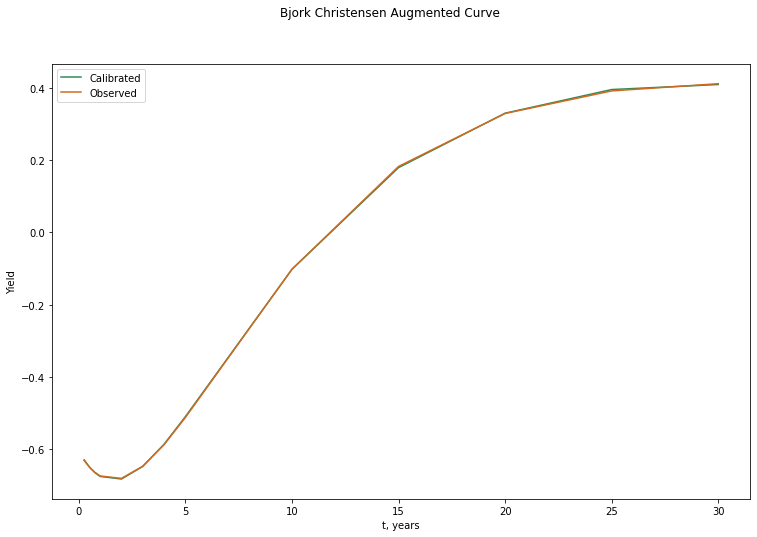

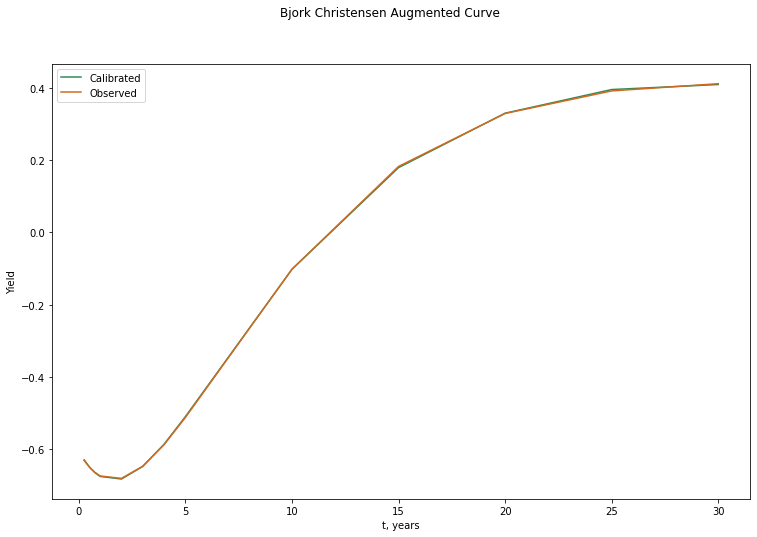

In [23]:
bjc_a.plot_calibrated(curve)

# Stochastic
Vasicek

    Attributes	Type	         Description
      alpha     Private	Model Coefficient alpha (mean reverting speed)
      beta	  Private	Model Coefficient Beta (long term mean)
      sigma	 Private	Short rate Volatility
      rt	    Private	Initial Short Rate
      time	  Params 	Time in years
      dt	    Private	time for each period
      steps	 Private	calculated with dt & time as time/dt

Todas las herramientas para graficar a partir de la simulación podrían aplicarse a los resultados de la simulación vasicek.

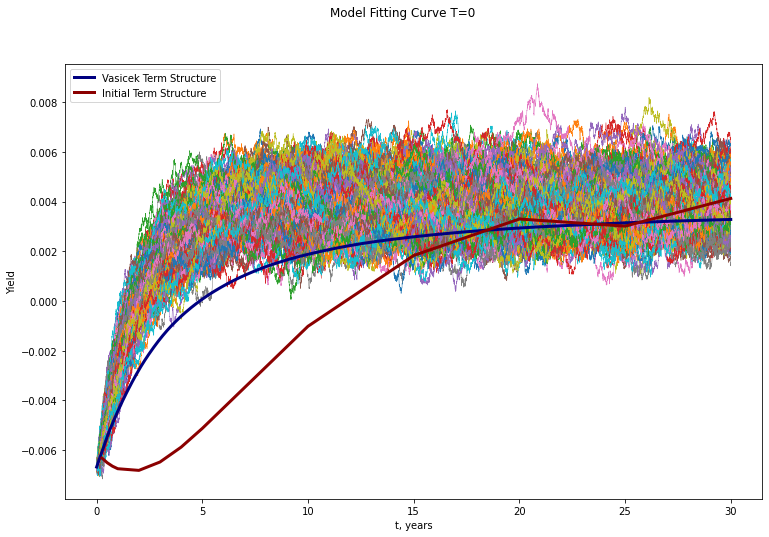

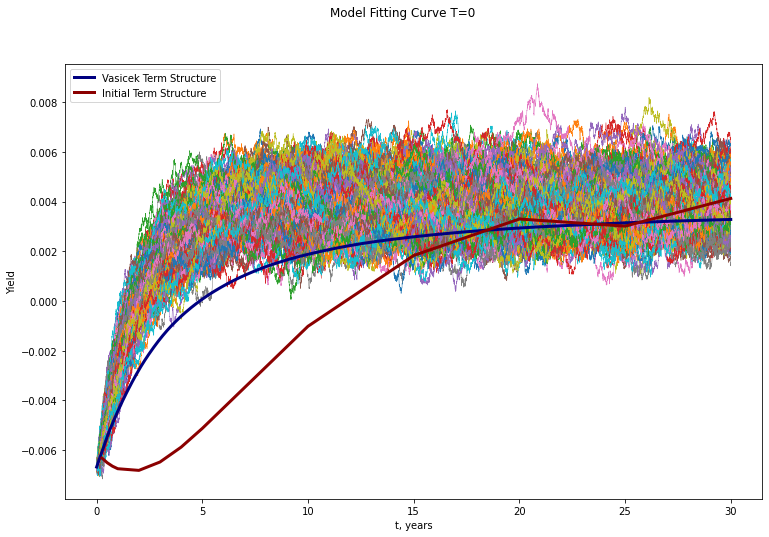

In [24]:
time = np.array([0.25, 0.5, 0.75, 1., 2.,
                 3., 4., 5., 10., 15.,
                 20., 25., 30.])
rate = np.array([-0.0063171, -0.00650322, -0.00664493, -0.00674608, -0.00681294,
                 -0.00647593, -0.00587828, -0.0051251, -0.00101804, 0.00182851,
                 0.0032962, 0.0030092117, 0.00412151])
curve = Curve(time,rate)
vasicek_model = Vasicek(0.5, 0.0040, 0.001, -0.0067, 30, 1 / 365)
simulation = vasicek_model.simulate_paths(200)
vasicek_model.plot_calibrated(simulation,curve)


# Hull & White

    Attributes	Type	          Description
      alpha	  Private	Model Coefficient alpha (mean reverting speed)
      sigma	  Private	Short rate Volatility
      rt	     Private	Initial Short Rate
      time	   Params	 Time in years
      dt	     Private	time for each period
      steps	  Private	calculated with dt & time as time/dt
      f_curve	Private	Curve : Initial instantaneous forward structure
      method	 Private	method used in order to interpolate f_curve

Todas las herramientas para graficar a partir de la simulación podrían aplicarse a los resultados de la simulación Hull-White.

Bjork & Christensen Augmented Model
beta0 = 0.000323788509014712
beta1 = 0.0004228717037061728
beta2 = 0.014730341157114642
beta3 = -0.030836605522207686
beta4 = -0.02062683594759975
tau = 1.1379111419506736
____________________________
Calibration Results
b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Mean Squared Error 3.084029851490995e-06
Number of Iterations 24
____________________________


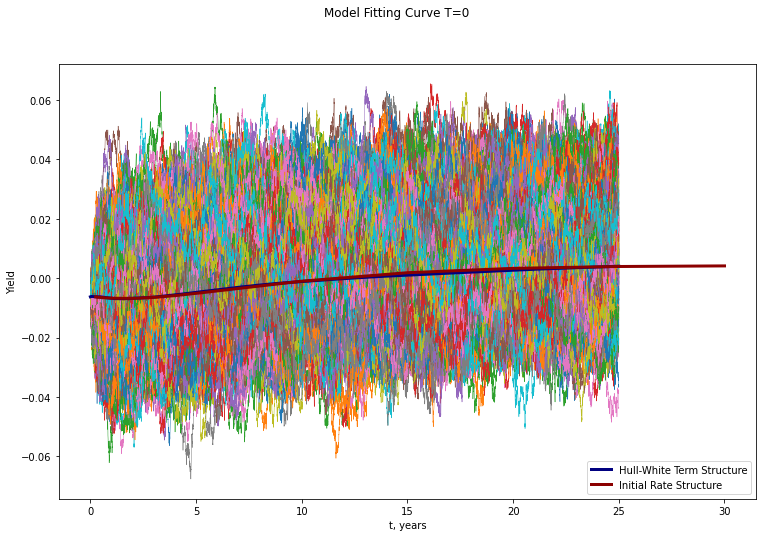

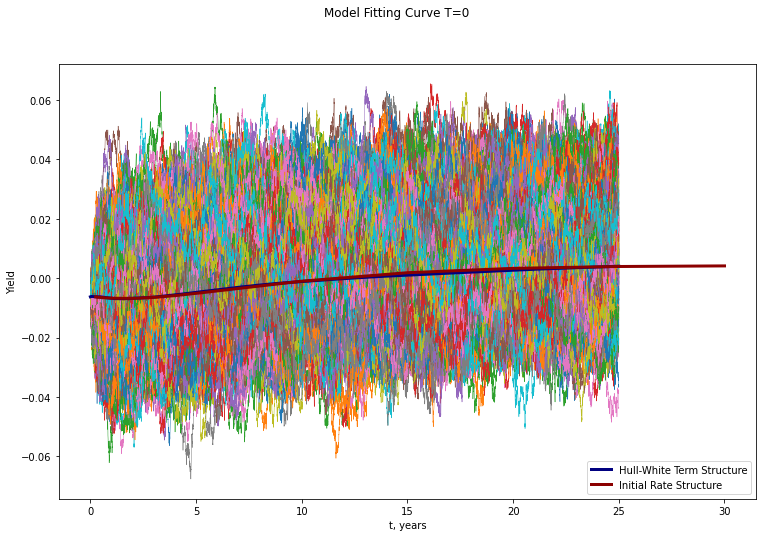

In [25]:
from PyCurve.bjork_christensen_augmented import BjorkChristensenAugmented
from PyCurve.hull_white import HullWhite
import numpy as np
from PyCurve.curve import Curve

# Instance of curve : Spot Rates
time = np.array([0.25, 0.5, 0.75, 1., 2.,
                 3., 4., 5., 10., 15.,
                 20., 25., 30.])
rate = np.array([-0.0063171, -0.00650322, -0.00664493, -0.00674608, -0.00681294,
                 -0.00647593, -0.00587828, -0.0051251, -0.00101804, 0.00182851,
                 0.0032962, 0.00392117, 0.00412151])
curve = Curve(time, rate)

# Deduce Forward rate via Bjork Christensen (as example but you can directly create an instance of Curve with values)

bjc_a = BjorkChristensenAugmented(0.3, 0.4, 12, 12, 12, 1)
bjc_a.calibrate(curve)
forward_curve = [-0.006301821217413436379]
forward_curve_t = [0]
for i in range(12):
    forward_curve.append(bjc_a.forward_rate(time[i], time[i + 1]))
    forward_curve_t.append(time[i])
instantaneous_forward = Curve(forward_curve_t, forward_curve)


# Hull and white model  with High Volatility
hull_white_model = HullWhite(1, 0.02, -0.0063, 25, 1 / 365, instantaneous_forward, 'linear')
simulation = hull_white_model.simulate_paths(1000)
hull_white_model.plot_calibrated(simulation,curve)


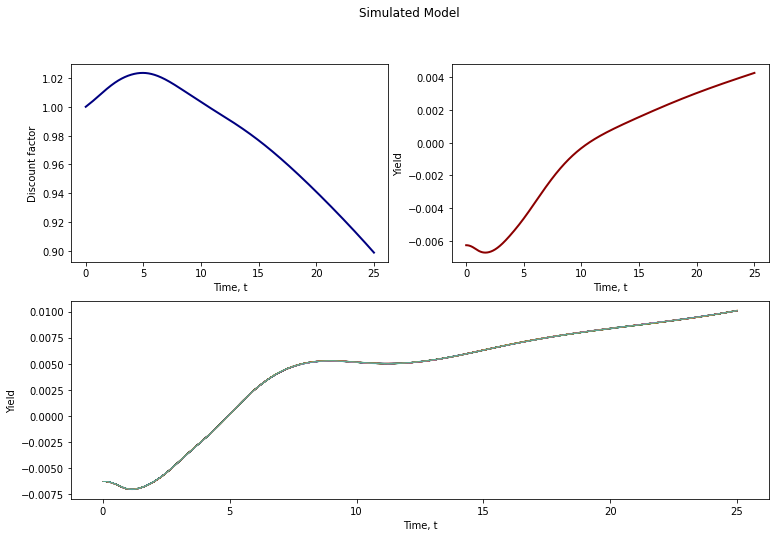

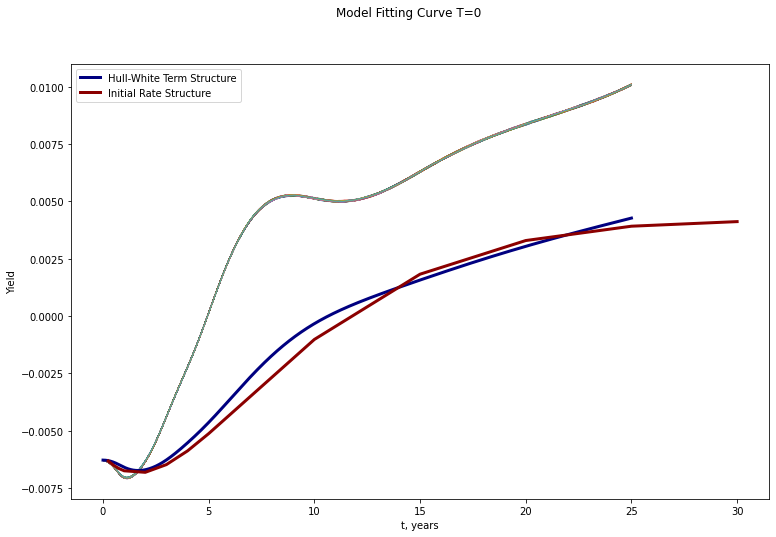

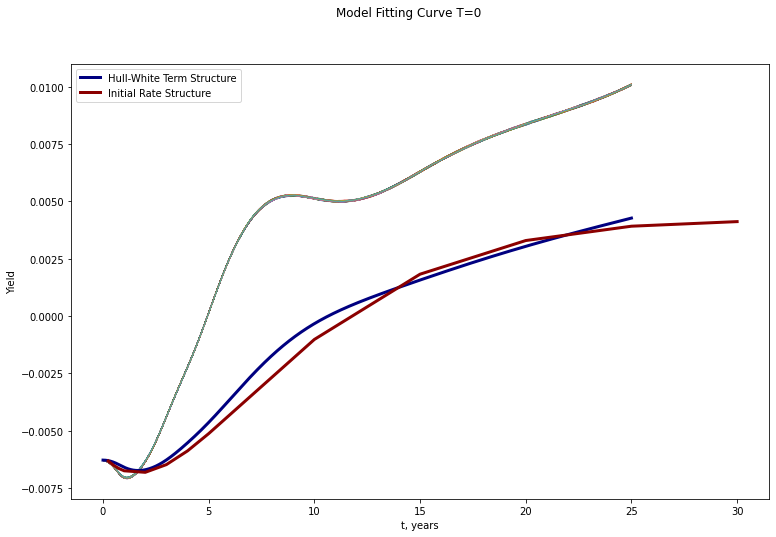

In [26]:
# Hull and white model  with High Volatility
hull_white_model_low_vol = HullWhite(1, 0.00002, -0.0063, 25, 1 / 365, instantaneous_forward, 'cubic')
simulation = hull_white_model_low_vol.simulate_paths(1000)
simulation.plot_model()
hull_white_model_low_vol.plot_calibrated(simulation,curve)